# Numerical Experiments on Parameters

First, we import the required files and libraries

In [3]:
# External Imports
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Internal Imports
from new import *

# Running Algoroithm
def run_algorithm(rho, lamb, sigma, percent, tolerance, max_it, method, perturbed):
    image = Image(name="Image", dims=(512, 512))
    image.load_image("Venice.jpeg")
    mask = Mask(percentage=percent, dims=(512, 512))
    image_corrupt = mask.mask_image(image.image)
    _, _, _, _, its, time, _ = Algorithm(image_corrupt, mask, rho, lamb, sigma, 
                                         tolerance, max_it, method, perturbed).run(False, False)
        
    return its, time

# Error Plots
def plot_its_time(parameters, max_it, its_A, its_PA, its_I, its_PI, 
                  time_A, time_PA, time_I, time_PI, xlabel, title):
    # Post analyse the data
    max_time = max(max(time_A), max(time_PA), max(time_I), max(time_PI))
    time_A = [time_A[i] if its_A[i] < max_it else max_time for i in range(len(time_A))]
    time_PA = [time_PA[i] if its_PA[i] < max_it else max_time for i in range(len(time_PA))]
    time_I = [time_I[i] if its_I[i] < max_it else max_time for i in range(len(time_I))]
    time_PI = [time_PI[i] if its_PI[i] < max_it else max_time for i in range(len(time_PI))]
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 4), dpi=600)

    fig.suptitle(title, fontsize=16, y=1)
    
    axs[0].title.set_text("Iterations to reach $10^{-3}$ tolerance")
    axs[0].plot(parameters, its_A, "b-", label="Accelerated")
    axs[0].plot(parameters, its_PA, "b--", label="Perturbed Accelerated")
    axs[0].plot(parameters, its_I, "g-", label="Inertial")
    axs[0].plot(parameters, its_PI, "g--", label="Perturbed Inertial")
    axs[0].axhline(y=max_it, color="r", label="Did Not Converge", linestyle="--")
    axs[0].set_ylabel("Iterations")
    axs[0].set_xlabel(xlabel)
    axs[0].legend()

    axs[1].title.set_text("Time to reach $10^{-3}$ tolerance")
    axs[1].plot(parameters, time_A, "b-", label="Accelerated")
    axs[1].plot(parameters, time_PA, "b--", label="Perturbed Accelerated")
    axs[1].plot(parameters, time_I, "g-", label="Inertial")
    axs[1].plot(parameters, time_PI, "g--", label="Perturbed Inertial")
    axs[1].axhline(y=max_time, color="r", label="Did Not Converge", linestyle="--")
    axs[1].set_ylabel("Time in seconds")
    axs[1].set_xlabel(xlabel)
    axs[1].legend()

    plt.show()
    
# Import the Image
image = Image(name="Image", dims=(512, 512))
image.load_image("Venice.jpeg")

# Universal Parameters
tolerance = 1e-3
max_it = 100

## On the ratio of erased pixels

In [2]:
# Set the parameters
rho = 1
sigma = 1
lamb = 0.5

parameters1 = np.linspace(0, 1, 21)  # Percentages

# Set empty lists for results
its1_A   = [0] * len(parameters1)
its1_PA  = [0] * len(parameters1)
its1_I   = [0] * len(parameters1)
its1_PI  = [0] * len(parameters1)
time1_A  = [0] * len(parameters1)
time1_PA = [0] * len(parameters1)
time1_I  = [0] * len(parameters1)
time1_PI = [0] * len(parameters1)

# Run the Algorithm
for i, percent in enumerate(tqdm(parameters1)):
    its1_A[i], time1_A[i] = run_algorithm(rho, lamb, sigma, percent,
                              tolerance, max_it, method="accelerated", perturbed=False)
    its1_PA[i], time1_PA[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="accelerated", perturbed=True)
    its1_I[i], time1_I[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="inertial", perturbed=False)
    its1_PI[i], time1_PI[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="inertial", perturbed=True)

  0%|          | 0/21 [00:00<?, ?it/s]

/Users/danielcortild/RuG Drive/BA Year 3/Bachelor Thesis/Code Python General/new/Algorithm.py:78: RuntimeWarning: invalid value encountered in double_scalars
  self.R = lambda X1, X0: np.linalg.norm(X1 - X0) / np.linalg.norm(X0)
/Users/danielcortild/RuG Drive/BA Year 3/Bachelor Thesis/Code Python General/new/Algorithm.py:78: RuntimeWarning: divide by zero encountered in double_scalars
  self.R = lambda X1, X0: np.linalg.norm(X1 - X0) / np.linalg.norm(X0)


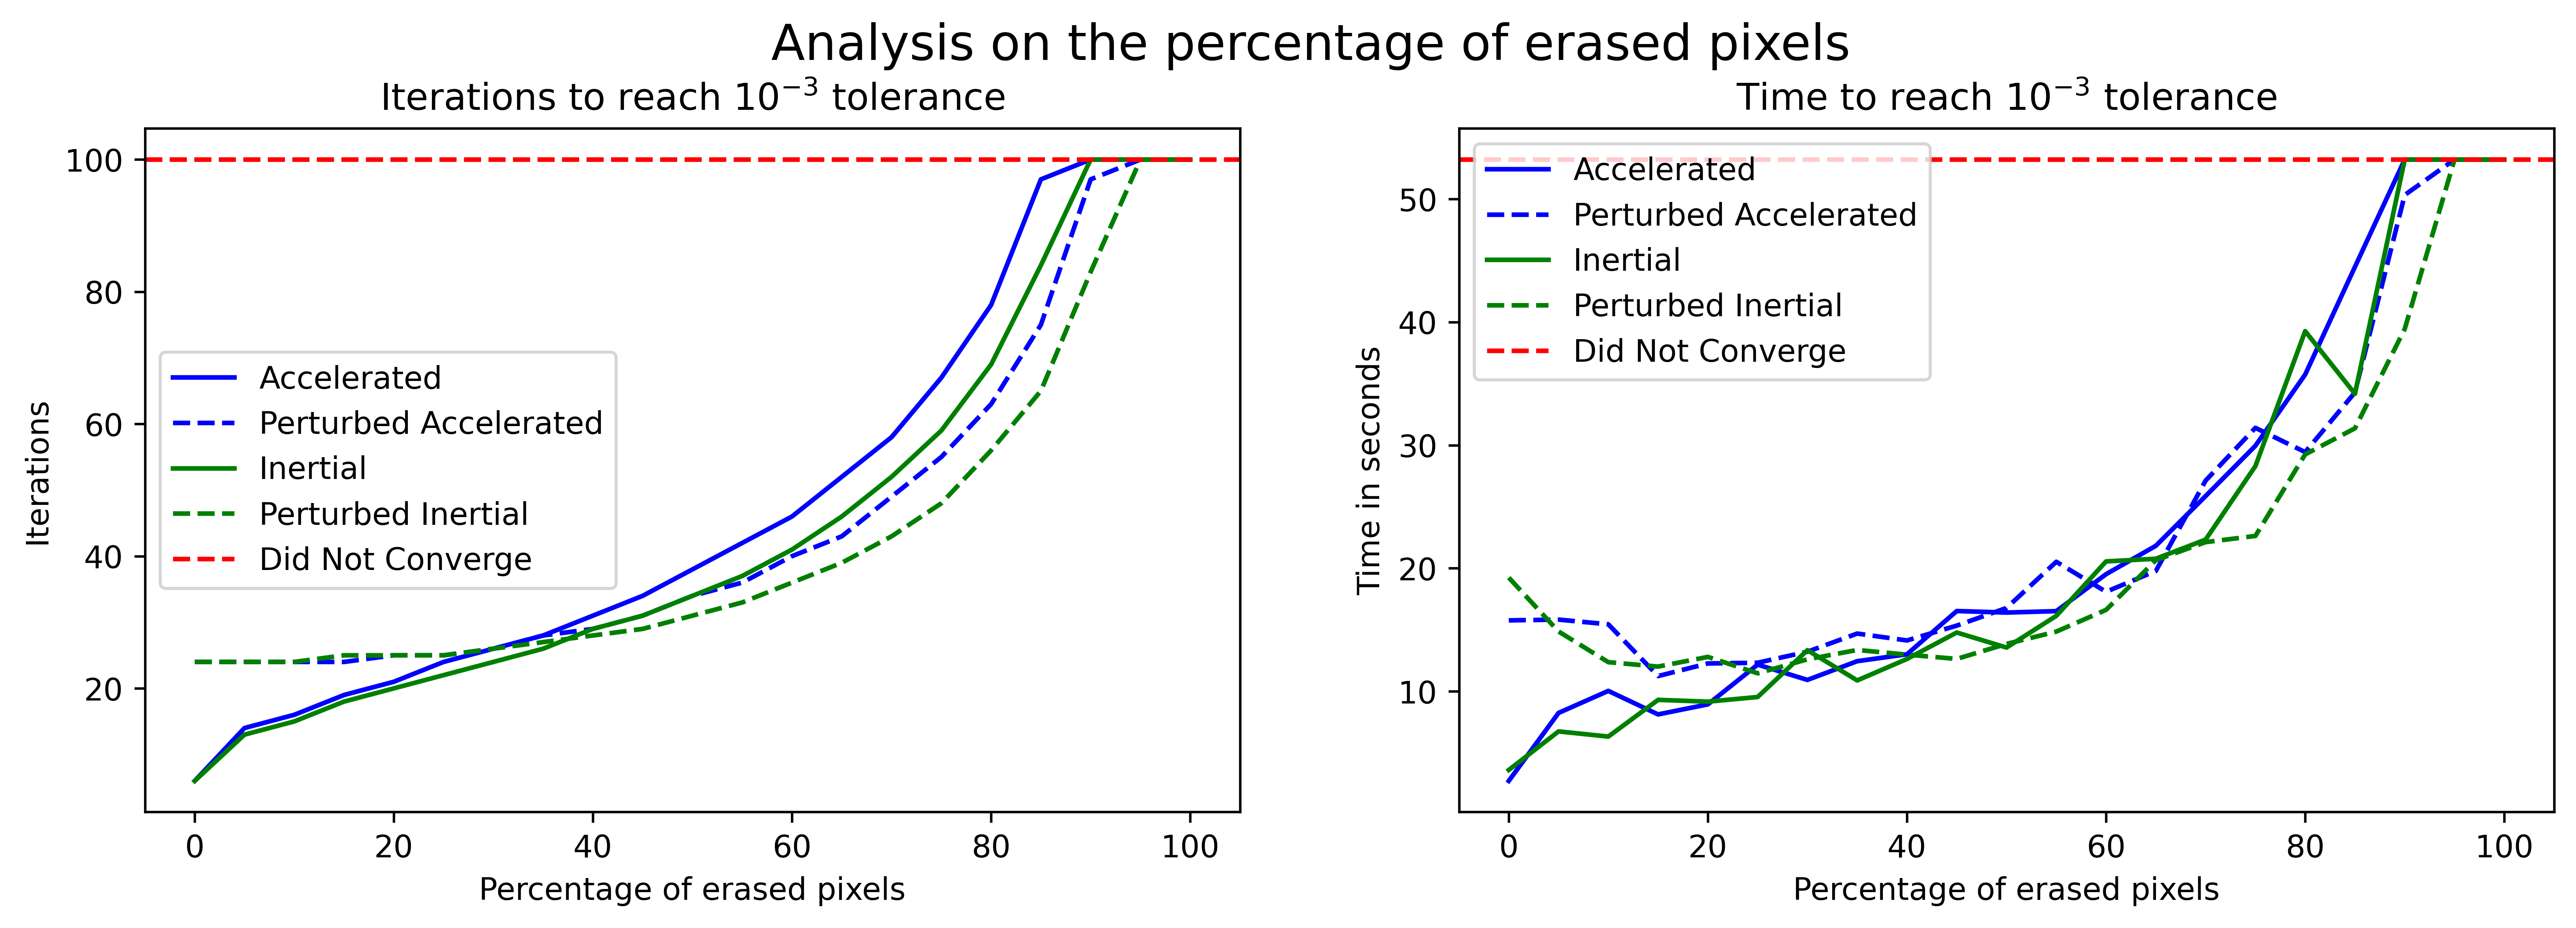

In [3]:
# Plot the results
plot_its_time(parameters1*100, max_it, its1_A, its1_PA, its1_I, its1_PI, 
              time1_A, time1_PA, time1_I, time1_PI,
              "Percentage of erased pixels", "Analysis on the percentage of erased pixels")

## On the step size

In [4]:
# Set the parameters
sigma = 1
lamb = 0.5
percent = 0.5

parameters2 = np.linspace(0.1, 1.9, 19)

# Set empty lists for results
its2_A   = [0] * len(parameters2)
its2_PA  = [0] * len(parameters2)
its2_I   = [0] * len(parameters2)
its2_PI  = [0] * len(parameters2)
time2_A  = [0] * len(parameters2)
time2_PA = [0] * len(parameters2)
time2_I  = [0] * len(parameters2)
time2_PI = [0] * len(parameters2)

# Run the Algorithm
for i, rho in enumerate(tqdm(parameters2)):
    its2_A[i], time2_A[i] = run_algorithm(rho, lamb, sigma, percent,
                              tolerance, max_it, method="accelerated", perturbed=False)
    its2_PA[i], time2_PA[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="accelerated", perturbed=True)
    its2_I[i], time2_I[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="inertial", perturbed=False)
    its2_PI[i], time2_PI[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="inertial", perturbed=True)

  0%|          | 0/19 [00:00<?, ?it/s]

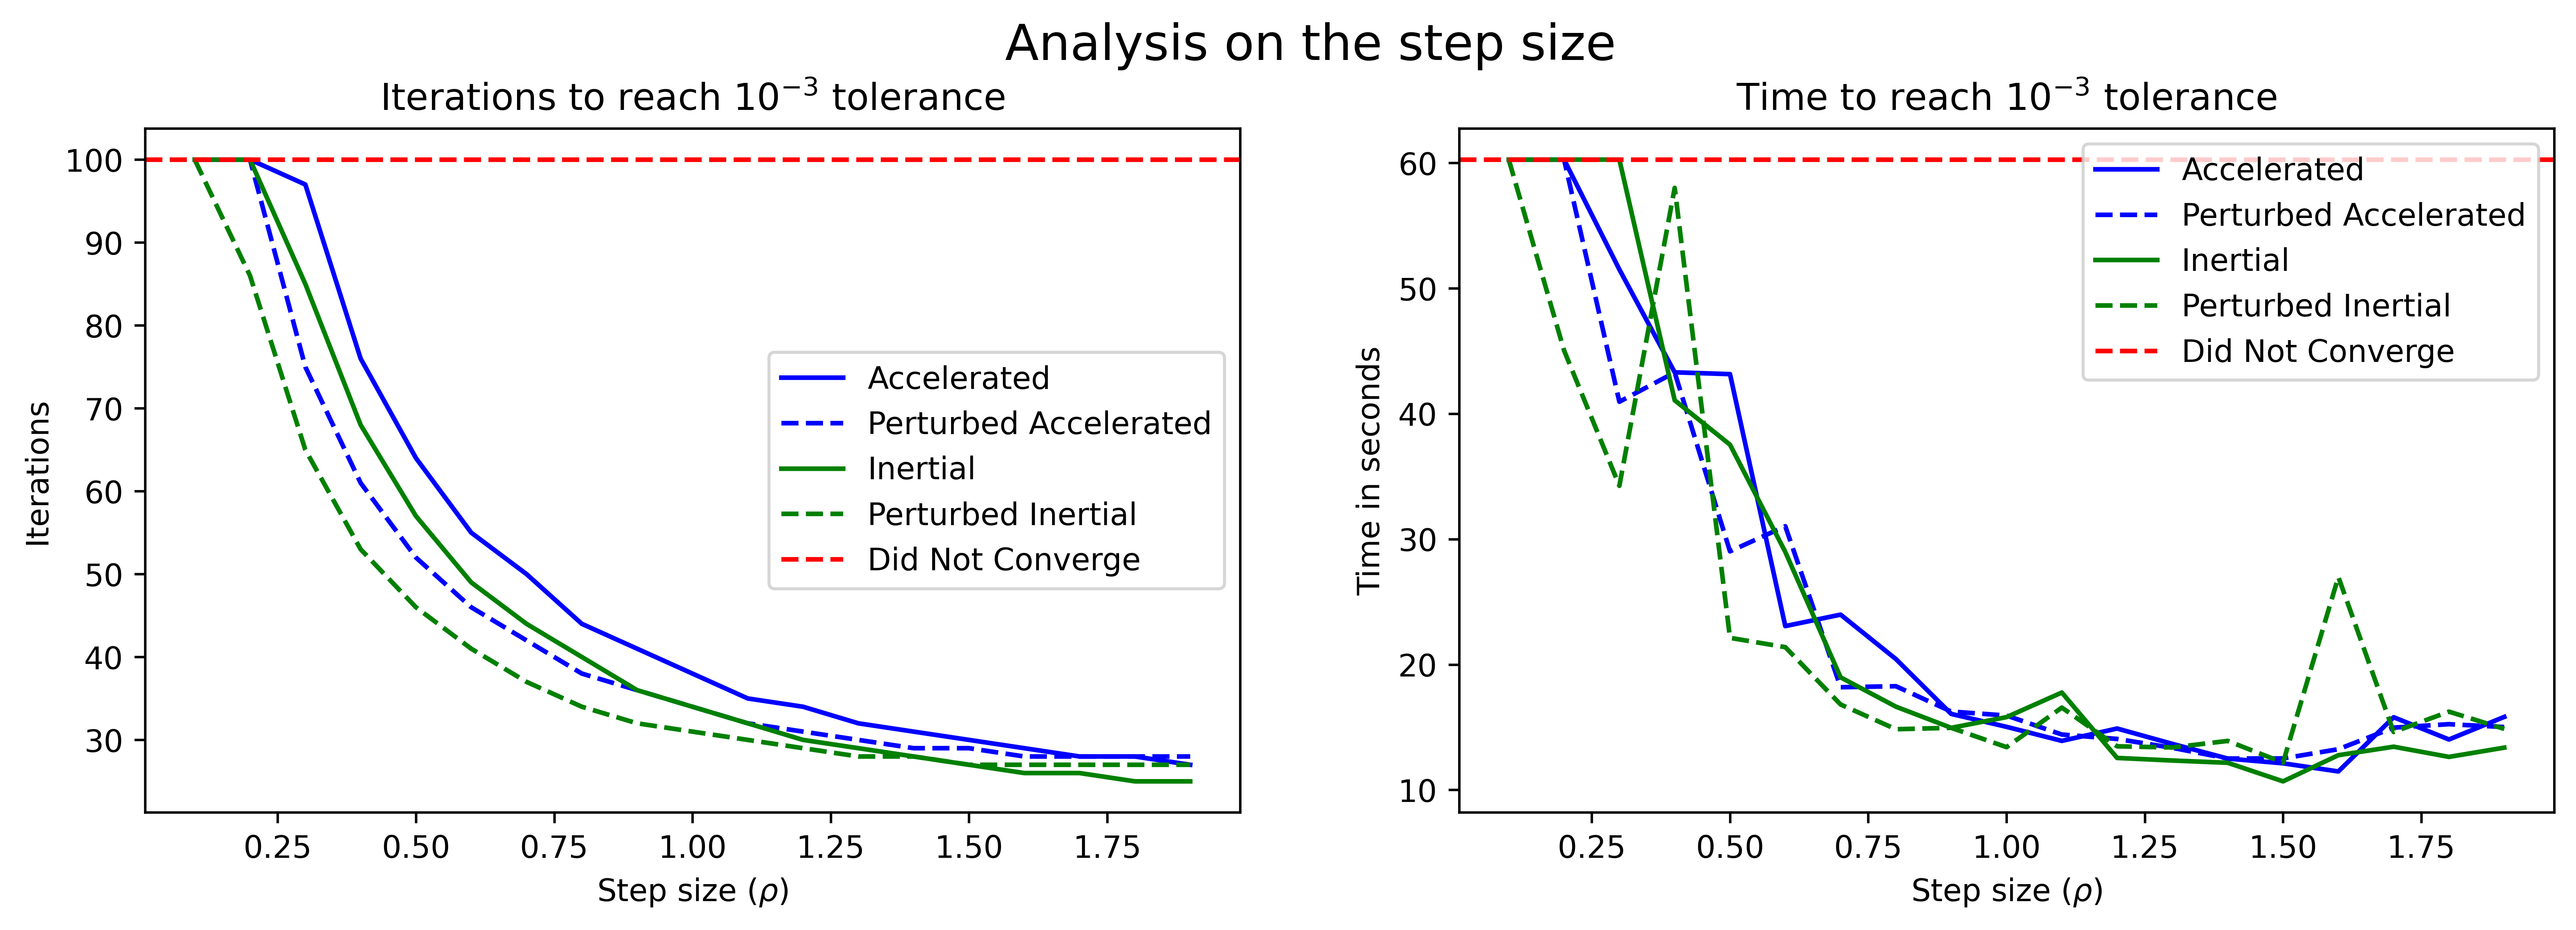

In [5]:
# Plot the results
plot_its_time(parameters2, max_it, its2_A, its2_PA, its2_I, its2_PI, 
              time2_A, time2_PA, time2_I, time2_PI,
              r"Step size ($\rho$)", "Analysis on the step size")

## On the relaxation parameter

In [5]:
# Set the parameters
sigma = 1
rho = 1
percent = 0.5

parameters3 = np.linspace(0.1, 1.4, 14)

# Set empty lists for results
its3_A   = [0] * len(parameters3)
its3_PA  = [0] * len(parameters3)
its3_I   = [0] * len(parameters3)
its3_PI  = [0] * len(parameters3)
time3_A  = [0] * len(parameters3)
time3_PA = [0] * len(parameters3)
time3_I  = [0] * len(parameters3)
time3_PI = [0] * len(parameters3)

# Run the Algorithm
for i, lamb in enumerate(tqdm(parameters3)):
    its3_A[i], time3_A[i] = run_algorithm(rho, lamb, sigma, percent,
                                  tolerance, max_it, method="accelerated", perturbed=False)
    its3_PA[i], time3_PA[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="accelerated", perturbed=True)
    its3_I[i], time3_I[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="inertial", perturbed=False)
    its3_PI[i], time3_PI[i] = run_algorithm(rho, lamb, sigma, percent,
                                    tolerance, max_it, method="inertial", perturbed=True)

  0%|          | 0/14 [00:00<?, ?it/s]

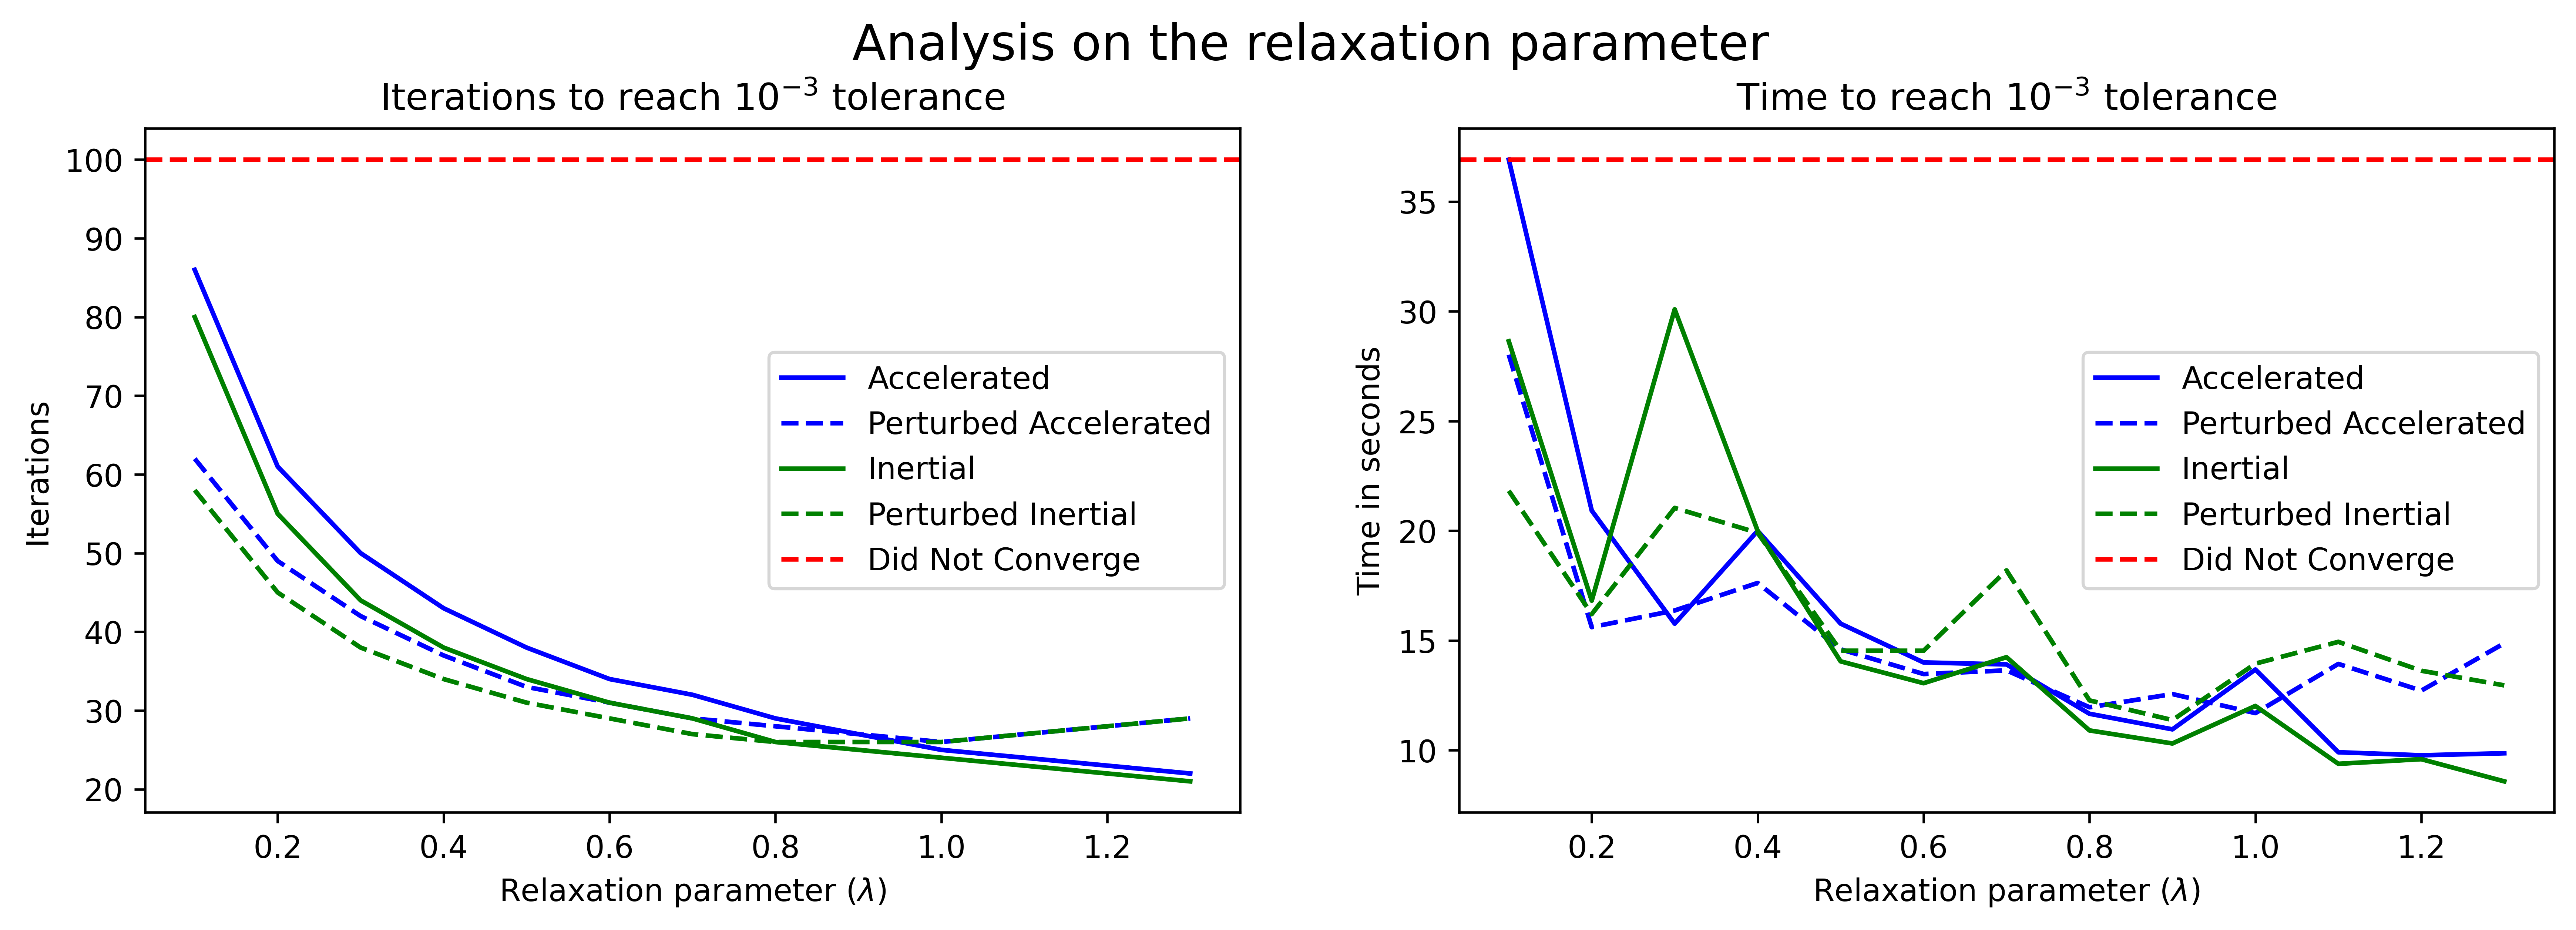

In [12]:
# Plot the results
time3_I[3]=20
plot_its_time(parameters3[:-1], max_it, its3_A[:-1], its3_PA[:-1], its3_I[:-1], its3_PI[:-1], 
              time3_A[:-1], time3_PA[:-1], time3_I[:-1], time3_PI[:-1],
              "Relaxation parameter ($\lambda$)", "Analysis on the relaxation parameter")

## On the regularisation parameter

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


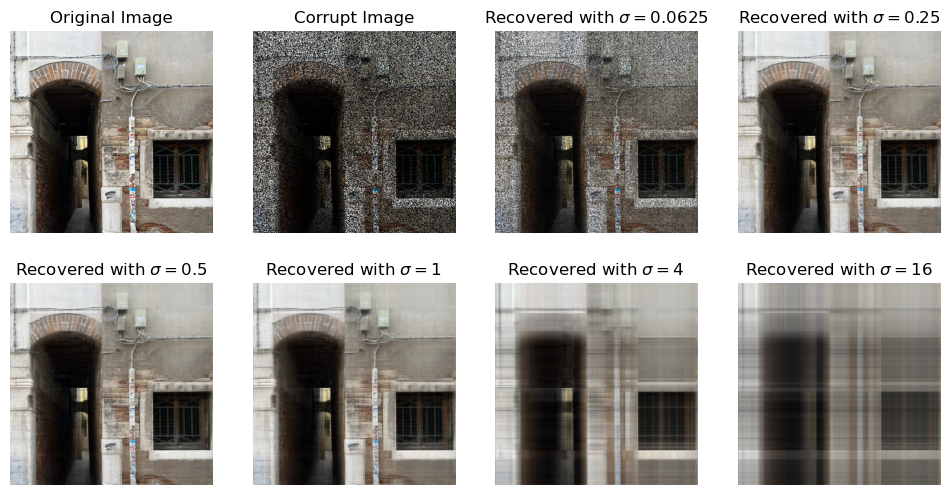

In [7]:
# Import the Image
image = Image(name="Image", dims=(512, 512))
image.load_image("Venice.jpeg")
mask = Mask(percentage=0.5, dims=(512, 512))
image_corrupt = mask.mask_image(image.image)

# Set the parameters
rho = 1
lamb = 0.5

# Create Algorithm Instances
sol_S, _, _, _, _, _, _ = Algorithm(image_corrupt, mask, rho, lamb, 0.0625, 
                                    tolerance, max_it, method="inertial", perturbed=False).run()
sol_PS, _, _, _, _, _, _ = Algorithm(image_corrupt, mask, rho, lamb, 0.25, 
                                    tolerance, max_it, method="inertial", perturbed=False).run()
sol_PS2, _, _, _, _, _, _ = Algorithm(image_corrupt, mask, rho, lamb, 0.5, 
                                    tolerance, max_it, method="inertial", perturbed=False).run()
sol_I, _, _, _, _, _, _ = Algorithm(image_corrupt, mask, rho, lamb, 1, 
                                    tolerance, max_it, method="inertial", perturbed=False).run()
sol_PI, _, _, _, _, _, _ = Algorithm(image_corrupt, mask, rho, lamb, 4, 
                                    tolerance, max_it, method="inertial", perturbed=False).run()
sol_PI2, _, _, _, _, _, _ = Algorithm(image_corrupt, mask, rho, lamb, 16, 
                                    tolerance, max_it, method="inertial", perturbed=False).run()

# Plot Original and Result
fig, axs = plt.subplots(2, 4, figsize=(12, 6), dpi=100)

axs[0,0].title.set_text("Original Image")
axs[0,0].imshow(image.image, vmin=0, vmax=1)
axs[0,0].set_axis_off()
axs[0,0].set_facecolor("white")

axs[0,1].title.set_text("Corrupt Image")
axs[0,1].imshow(image_corrupt, vmin=0, vmax=1)
axs[0,1].set_axis_off()
axs[0,1].set_facecolor("white")

axs[0,2].title.set_text(r"Recovered with $\sigma=0.0625$")
axs[0,2].imshow(sol_S, vmin=0, vmax=1)
axs[0,2].set_axis_off()
axs[0,2].set_facecolor("white")

axs[0,3].title.set_text(r"Recovered with $\sigma=0.25$")
axs[0,3].imshow(sol_PS, vmin=0, vmax=1)
axs[0,3].set_axis_off()
axs[0,3].set_facecolor("white")

axs[1,0].title.set_text(r"Recovered with $\sigma=0.5$")
axs[1,0].imshow(sol_PS2, vmin=0, vmax=1)
axs[1,0].set_axis_off()
axs[1,0].set_facecolor("white")

axs[1,1].title.set_text(r"Recovered with $\sigma=1$")
axs[1,1].imshow(sol_I, vmin=0, vmax=1)
axs[1,1].set_axis_off()
axs[1,1].set_facecolor("white")

axs[1,2].title.set_text(r"Recovered with $\sigma=4$")
axs[1,2].imshow(sol_PI, vmin=0, vmax=1)
axs[1,2].set_axis_off()
axs[1,2].set_facecolor("white")

axs[1,3].title.set_text(r"Recovered with $\sigma=16$")
axs[1,3].imshow(sol_PI2, vmin=0, vmax=1)
axs[1,3].set_axis_off()
axs[1,3].set_facecolor("white")

plt.show()